# Phase 1 Project

This project marks the end of Phase 1 part of the Moringa Data Science Program.
In it, we have been given a data set to analyse with several expectations as below:

## 1. Overview

This overview has been borrowed from the Canvas assignment:

Our company is planning to diversify into the aviation business and plans to purchase and operate aircrafts for both commercial and private enterprises. Since the industry carries a lot of safety, financial and operational risks, the leadership wants to identify which aircraft models have the lowest risk investment while balancing safety, reliability and cost-effectiveness.

## 2. Business Understanding

Our company aims to:

### Objectives:

To determine:

1. Different aircraft make and models and categorize based on aircraft category and purpose of flight.

Within each category, to determine the relation between Airplane Make and:

2.  Operational cost effectiveness (Engine type).

3. Safety risk (injury severity, total fatal injuries, total serious injuries, total minor injuries). 

4. Mechanical reliability and environmental susceptibility of the aircraft (aircraft damage).


To determine success, this will be measured by delivering clear data presenting recommendations to guide procurement of the most suitable Aircraft Makes.
 

## 3. Data Understanding

### Data Source
The data we will be using was sourced from the National Transportation Safety Board.

### Data Description
The data includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters and it captures the following:

Event.Id

Investigation.Type

Accident.Number

Event.Date

Location

Country

Latitude

Longitude

Airport.Code

Airport.Name

Injury.Severity

Aircraft.damage

Aircraft.Category

Registration.Number

Make

Model

Amateur.Built

Number.of.Engines

Engine.Type

FAR.Description

Schedule

Purpose.of.flight

Air.carrier

Total.Fatal.Injuries

Total.Serious.Injuries

Total.Minor.Injuries

Total.Uninjured

Weather.Condition

Broad.phase.of.flight

Report.Status

Publication.Date


This marks the end of the Data Preparation and Cleaning. 

## 4. Data analysis

We will need several libraries for the following purposes:

1. Pandas - to read, edit and save our python files.
2. Numpy - for statistical computations for measures of central tendency and dispersion.
3. Matplotlib and seaborn - for visualizations.

### 4.1 Data Preparation

We shall first start off with data cleaning

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read into our aviation csv data using pandas and save it as variable name - aviation_data

aviation_data = pd.read_csv('Aviation_Data.csv')

c:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# read into our first 5 rows to understand how the data is organized
aviation_data.head()

# lets look at the columns we have to define further our data requirements
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
#let us check the total length of the data frame, rows, columns and missing entries
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null


The dataset had a total of 90,348 rows (entries) and 31 columns. 
Out of the many columns in the previous cell, we need to define the ones we will be using for our analysis.
The project expects us to determine the best aircraft based on accidents profile. Therefore the following columns may be necessary.
Out of the 31 columns, we have selected the 12 below to answer our objectives that were listed above:

1. Event Date 
2. Total Fatal Injuries
3. Total Serious Injuries
4. Total minor injuries
5. Injury Severity
6. Aircraft Damage
7. Make - type of aircraft
8 Model - type of the model of the make
9. Engine type
10. Aircraft Category 
11. Purpose of flight
12. Air carrier



In [5]:
# let us create a variable name 'selected_columns' which has the columns we purposefully selected for this assignment
selected_columns = ['Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 'Engine.Type',
'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries']

In [6]:
# let us re-create our aviation_data dataset with only the selected columns:
aviation_data = aviation_data[selected_columns]

In [7]:
# let us check out the column names to confirm that we only have the selected columns as well as the fact that they should be only 12
aviation_data.columns, len(aviation_data.columns)

(Index(['Event.Date', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
        'Make', 'Model', 'Engine.Type', 'Purpose.of.flight', 'Air.carrier',
        'Total.Fatal.Injuries', 'Total.Serious.Injuries',
        'Total.Minor.Injuries'],
       dtype='object'),
 12)

#### Handling missing data

In [8]:
# let us go through each of the selected columns again and determine their data types and how many missing values they have
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Injury.Severity         87889 non-null  object 
 2   Aircraft.damage         85695 non-null  object 
 3   Aircraft.Category       32287 non-null  object 
 4   Make                    88826 non-null  object 
 5   Model                   88797 non-null  object 
 6   Engine.Type             81812 non-null  object 
 7   Purpose.of.flight       82697 non-null  object 
 8   Air.carrier             16648 non-null  object 
 9   Total.Fatal.Injuries    77488 non-null  float64
 10  Total.Serious.Injuries  76379 non-null  float64
 11  Total.Minor.Injuries    76956 non-null  float64
dtypes: float64(3), object(9)
memory usage: 8.3+ MB


In [9]:
# Before we can do an analysis on our data, we first need to fill in the missing values based on the type of data.
# We have 5 columns that are float data type (numeric) and 11 that are object (non-numeric)
# Let us create a for loop to determine how many missing values first in the float64 columns:
for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print (column, aviation_data[column].isna().sum())

Total.Fatal.Injuries 12860
Total.Serious.Injuries 13969
Total.Minor.Injuries 13392


In [10]:
# let us do the same but now for the object column:
for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, aviation_data[object_column].isna().sum())

Event.Date 1459
Injury.Severity 2459
Aircraft.damage 4653
Aircraft.Category 58061
Make 1522
Model 1551
Engine.Type 8536
Purpose.of.flight 7651
Air.carrier 73700


In [11]:
# Now that we have both the numeric as well as the non numeric information with missing values
# Let us first start by filling in the missing values in the numeric column.
# We will begin by first getting the measures of central tendencies of the data

aviation_data.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,77488.000000,76379.000000,76956.000000
mean,0.647855,0.279881,0.357061
std,5.485960,1.544084,2.235625
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,349.000000,161.000000,380.000000


In [12]:
# For the remaining numerical data, they have wide range of observations between 0 to maximum, therefore the 'mean' might not be the best measure of central tendency. 
# Let us look at the median
# using a for loop

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print (column, aviation_data[column].median())

Total.Fatal.Injuries 0.0
Total.Serious.Injuries 0.0
Total.Minor.Injuries 0.0


In [13]:
# It looks like in many injuries, the majority of the number of injuries per accident were not as high. Let us see this with the help of a boxplot for each of the numerical data
# let us create a function that will do this for each of the numeric data

def box_plot_data(column):
    """
    Plots a box plot of the column so that we can visually see the spread of the data to better make sense of the low mean and median values we are getting
    """
    return sns.boxplot(column)
    
    

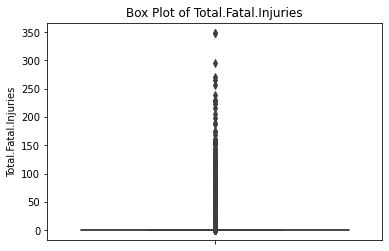

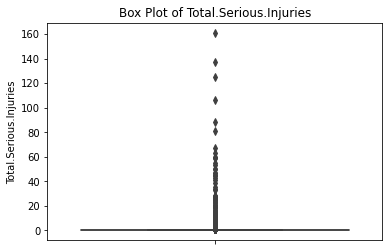

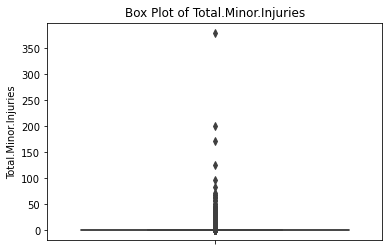

In [14]:
# let us employ the 'box_plot_data' function in a for loop

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=aviation_data[column])
        plt.title(f"Box Plot of {column}")
        plt.show()

In [15]:
# The boxplots shown above have alot of outlier values. In our filling of missing values THEN, we will not opt to drop out our values, since each accident matters.
# We will not opt to fill with mean since outliers might inflate the mean
# We will therefore fill in with the median instead 
# Again, we will use a for loop and set argument inplace = True to save our changes in the dataframe.

for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        aviation_data[column].fillna(aviation_data[column].median(), inplace = True)
    

In [16]:
# Let us confirm that we have filled in our missing numerical values with their medians and that there are no other missing values
for column in aviation_data.columns:
    if aviation_data[column].dtype == 'float64':
        print(column, aviation_data[column].isna().sum())

Total.Fatal.Injuries 0
Total.Serious.Injuries 0
Total.Minor.Injuries 0


In [17]:
# let us now go back to the categorical columns which also had missing values
# copying the code we used:

for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, aviation_data[object_column].isna().sum())

Event.Date 1459
Injury.Severity 2459
Aircraft.damage 4653
Aircraft.Category 58061
Make 1522
Model 1551
Engine.Type 8536
Purpose.of.flight 7651
Air.carrier 73700


In [18]:
# our total data length was 90,348. Some of our categorical values seem to be largely missing such as: Air carrier (73700) and schedule (77766) as well as aircraft category (58061).
# Despite the fact that all accidents matter, trying to fill in these missing values might affect the overall interpretation of data. However dropping them might also lead to attrition bias, where we have lost too much data.
# We will therefore opt to fill in the columns with less than 10% missing values with mode but drop all the columns with more than 10% missing values

for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        if aviation_data[object_column].isna().sum() < 9035:
            aviation_data[object_column].fillna(aviation_data[object_column].mode()[0], inplace = True)
        else:
            aviation_data.dropna(subset = [object_column], inplace = True)



In [19]:
# let us confirm that our missing categorical values are dropped and that there are no missing values
for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, aviation_data[object_column].isna().sum())

Event.Date 0
Injury.Severity 0
Aircraft.damage 0
Aircraft.Category 0
Make 0
Model 0
Engine.Type 0
Purpose.of.flight 0
Air.carrier 0


In [20]:
# let us now check the number of entries we are working with:
len(aviation_data) # unfortunately, we have dropped from 90348 entries to 3488 due to the missing entries in the non-numerical columns

13625

#### Handling Duplicates

In [21]:
# Before we wind up on Data cleaning and go on to analysis, let us check if there are duplicates and drop them 

aviation_data.duplicated().sum()

# there are only 3 duplicate entries. We opt to drop them

aviation_data.drop_duplicates(inplace = True)

# let us recheck that duplicates are dropped
aviation_data.duplicated().sum() # The duplicates are all dropped.


0

#### Standardize and confirm uniqueness of value counts of Categorical Variables

In [22]:
# Let us check the output of value counts in the categorical variables using a for loop
for object_column in aviation_data.columns:
    if aviation_data[object_column].dtype == 'object':
        print (object_column, '', aviation_data[object_column].value_counts())

Event.Date  2011-06-18    15
2012-08-31    13
2011-08-13    12
2011-07-23    12
2011-04-01    11
              ..
1982-06-02     1
2017-10-12     1
2017-09-19     1
2017-01-31     1
2015-01-27     1
Name: Event.Date, Length: 4953, dtype: int64
Injury.Severity  Non-Fatal    10850
Fatal         2478
Minor           88
Incident        77
Serious         76
Fatal(1)        17
Fatal(2)        16
Fatal(4)         6
Fatal(3)         6
Fatal(6)         2
Fatal(8)         2
Fatal(27)        1
Fatal(65)        1
Fatal(13)        1
Fatal(10)        1
Fatal(5)         1
Fatal(9)         1
Name: Injury.Severity, dtype: int64
Aircraft.damage  Substantial    11586
Destroyed       1323
Minor            675
Unknown           40
Name: Aircraft.damage, dtype: int64
Aircraft.Category  Airplane             11266
Helicopter            1914
Glider                 190
Balloon                 97
Weight-Shift            65
Powered Parachute       40
Gyrocraft               36
Ultralight               8
WSFT    

In [23]:
# from the above output, the value_counts of the 'injury-severity' has too many 'Fatal' outputs that can be merged into one fatal output.
# Let us use the .replace() function to do this.

aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].replace(
    to_replace=r'Fatal.*', 
    value='Fatal', 
    regex=True,
)


In [24]:
# Let us confirm that we have converted all 'Fatals' into one.
aviation_data['Injury.Severity'].value_counts()

Non-Fatal    10850
Fatal         2533
Minor           88
Incident        77
Serious         76
Name: Injury.Severity, dtype: int64

In [25]:
# In the aviation['data'] Cessna is represented twice as cessna (in small letters) and CESSNA (in capital letters) as well as BOEING and boeing
# Let us also edit the value_counts of these outputs by first stripping all the letters in the words then making onlt the first letter Capital.

aviation_data['Make'] = aviation_data['Make'].astype(str).str.strip().str.title()

In [ ]:
# Note that the data on purpose of flight has a lot of unknown values (2864)

#Remove rows where Purpose.of.flight is "Unknown"

aviation_data = aviation_data[aviation_data['Purpose.of.flight'].str.upper() != 'UNKNOWN']

# Check the result
aviation_data['Purpose.of.flight'].value_counts()   # we have removed the large number of unknown values  

Personal                     8241
Instructional                1961
Aerial Application            884
Business                      388
Positioning                   353
Other Work Use                277
Aerial Observation            231
Flight Test                   146
External Load                  95
Executive/corporate            85
Skydiving                      81
Public Aircraft - Federal      74
Ferry                          67
Banner Tow                     61
Public Aircraft - Local        59
Public Aircraft - State        47
Air Race show                  43
Public Aircraft                36
Glider Tow                     34
Firefighting                   28
Air Drop                        6
PUBS                            3
ASHO                            2
PUBL                            1
Name: Purpose.of.flight, dtype: int64